## Материалы ##

Презентация: https://drive.google.com/drive/folders/1SQeZwarTYlTH52erfNX6lRPrUZBSD8He?usp=sharing

Дэшборд: https://public.tableau.com/app/profile/vladimir.kharitonov/viz/final_dash_16809009758540/Dashboard1?publish=yes

# «Метанпромбанк» — деньги не пахнут! #

### Задача**:**

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*

## Декомпозиция ##

1. Открытие и предобработка данных
    
    1.1 Загрузить данные
    
    1.2 Посмотреть общую информацию о датафрейме
    
    1.3 Посмотреть в каких столбцах есть пропуски и изучить их природу
    
    1.4 Заполнить пропуски там, где есть необходимость. Особенно обратить внимание на баланс

    1.5 Изучить дубликаты, удалить явные дубликаты
    
    1.6 Изменить типы данных в столбцах, где есть необходимость
    
    1.7 Найти и устранить аномальные значения
    
    1.8 Добавить столбцы для исследования корреляций по городам, полу

2. Исследовательский анализ данных

    2.1 Построение матрицы корреляций

    2.2 Определить портреты пользователей

    2.3 Проверка статистических гипотез

    2.4 Выделить показатели, влияющие на потребление продуктов

    2.5 Провести сегментацию клиентов, выделить проблемные сегменты, в которых высокая доля отточных клиентов

3. Сделать выводы и привести рекомендации

## Описание проекта ##

### Задача**:**

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*
    
**Исходные данные.** Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 12 столбцов, 10 000 строк

**Структура проекта:**

[Часть 1. Открытие и предобработка данных](#step1)

Часть 2. Исследовательский анализ данных

  [2.1 Матрица корреляций](#step2_1)

  [2.2 Портрет клиентов](#step2_2)

[Часть 3. Проведение гипотез](#step3)

[Часть 4. Сегментирование](#step4)

[Часть 5. Рекомендации](#step5)


## Открытие и предобработка данных ##

<a id='step1'></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import os

Загрузим данные и посмотрим общую информацию о датафрейме.

Датафрейс представляет собой 12 столбцов и 10000 строк и содержит в себе информацию о клиентах банка

Главным образом, мы видим много пропущенных значений в столбце Баланс. Их природу выявим позднее

Явных дубликатов не обнаружено

In [2]:
def read_file(file_name):
    path1 = os.path.join('/datasets', file_name)
    path2 = os.path.join(file_name)
    if os.path.exists(path1):
        data = pd.read_csv(path1)
        return data
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
        return data
    else:
        print('File is not found')

In [3]:
data = read_file('bank_dataset.csv')

In [4]:
def information(df):
    display(df.head())
    print(' ')
    print('Информация о таблице')
    print(' ')
    display(df.info())  
    print(' ')
    print('Пропущенные значения')
    print(' ')
    display(df.isna().sum())
    print(' ')
    print('Дубликаты')
    print(' ')
    display(df.duplicated().sum())
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [5]:
information(data)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


 
Информация о таблице
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

 
Пропущенные значения
 


userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

 
Дубликаты
 


0

In [6]:
data.city.unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Отступим от плана декомпозиции и сначала создадим категориальные столбцы для каждого города и пола, чтобы корректнее оценить природу пропусков

In [7]:
data['city_yaroslavl'] = data['userid'].isin(data.loc[data['city'] == 'Ярославль']['userid']).replace({True:1, False:0})
data['city_rybinsk'] = data['userid'].isin(data.loc[data['city'] == 'Рыбинск']['userid']).replace({True:1, False:0})
data['city_rostov'] = data['userid'].isin(data.loc[data['city'] == 'Ростов Великий']['userid']).replace({True:1, False:0})
data['gender_m'] = data['userid'].isin(data.loc[data['gender'] == 'М']['userid']).replace({True:1, False:0})
data['gender_w'] = data['userid'].isin(data.loc[data['gender'] == 'Ж']['userid']).replace({True:1, False:0})

In [8]:
no_credit = []
for i in range(len(data['creditcard'])):
    if data['creditcard'][i] == 1:
        no_credit.append(-1)
    else:
        no_credit.append(0)


In [9]:
no_credit = pd.Series(no_credit)
data['products_no_credit'] = data['products'] + no_credit

Построим гистограмму по балансу клиентов

Мы видим, что большая часть клиентов имеет баланс от 100 000 до 150 000, нулевые значения отсутствуют. Может ли быть такое, что пропущенные значения являются нулевыми? Попробуем в этом разобраться

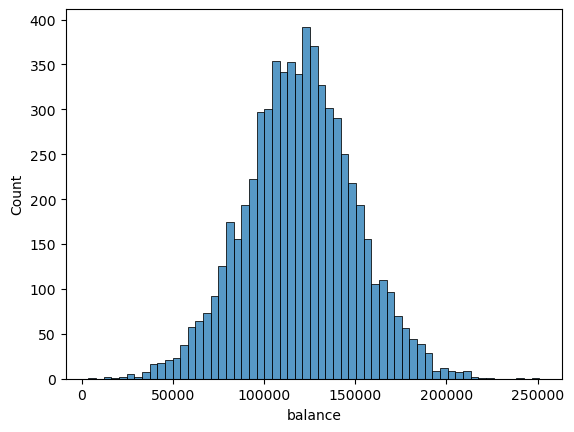

In [10]:
sns.histplot(data['balance'])
plt.show()

Рассчитаем, какой процентов пропусков приходится на каждый новый созданный столбец, а также другие:

**Выводы**:

* Больше всего пропусков среди клиентов Ярославля и мужчин
* В Ростове Великом пропущенных значений нет
* Более 72 % клиентов-владельцев кредитной карты имеют пропуски в балансе

Сложно объяснить, почему присутствуют пропуски в столбцах с балансом, данные пропуски относятся к типу MNAR, оставим их как есть


In [11]:
print('Среди клиентов из Ярославля пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['city_yaroslavl'].mean(), 2)))
print('Среди клиентов из Рыбинска пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['city_rybinsk'].mean(), 2)))
print('Среди клиентов из Ростова Великого пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['city_rostov'].mean(), 2)))
print('Среди клиентов мужского пола пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['gender_m'].mean(), 2)))
print('Среди клиентов женского пола пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['gender_w'].mean(), 2)))
print('Среди клиентов, имеющих кредитную карту, пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['creditcard'].mean(), 2)))
print('Среди активных клиентов пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['loyalty'].mean(), 2)))
print('Среди ушедших клиентов пропусков в балансе:',\
      "{:.0%}".format(round(data.loc[data['balance'].isna()]['churn'].mean(), 2)))

Среди клиентов из Ярославля пропусков в балансе: 67%
Среди клиентов из Рыбинска пропусков в балансе: 33%
Среди клиентов из Ростова Великого пропусков в балансе: 0%
Среди клиентов мужского пола пропусков в балансе: 54%
Среди клиентов женского пола пропусков в балансе: 46%
Среди клиентов, имеющих кредитную карту, пропусков в балансе: 72%
Среди активных клиентов пропусков в балансе: 52%
Среди ушедших клиентов пропусков в балансе: 14%


56% клиентов с двумя продуктами имеют пропуск в балансе, меньше всего пропусков у клиентов с одним продуктом

In [12]:
bal_group = data.loc[data['balance'].isna()].groupby('products', as_index=False).agg({'userid':'count'})
bal_group = bal_group.merge(data.groupby('products', as_index=False).agg({'userid':'count'}), on='products', how='left')
bal_group = bal_group.rename(columns={'userid_x':'null_bal', 'userid_y':'not_null_ball'})
bal_group['perc'] = bal_group['null_bal']*100.0/bal_group['not_null_ball']
bal_group

,products,null_bal,not_null_ball,perc
0,1,905,5084,17.800944
1,2,2600,4590,56.644880
2,3,98,266,36.842105
3,4,14,60,23.333333


### Исследователский анализ данных ###

<a id='step2_1'></a>

Построим матрицу корреляций

**Выводы:**

* Слабая-умеренная положительная корреляция между уходящими клиентами и возрастом. Чем старше клиенты, тем они более подвержены уходу

* Слабая отрицательная корреляция между уходящими клиентами и их активностью. Менее активные клиенты больше подвержены риску ухода

* Клиенты из Ярославля и Рыбинска менее подвержены уходу. Присутствует слабая корреляция между уходом и жителями Ростова Великого

* Уходу из банка более подвержены женщины (слабая корреляция)

* Корреляций по продуктам не выявлено

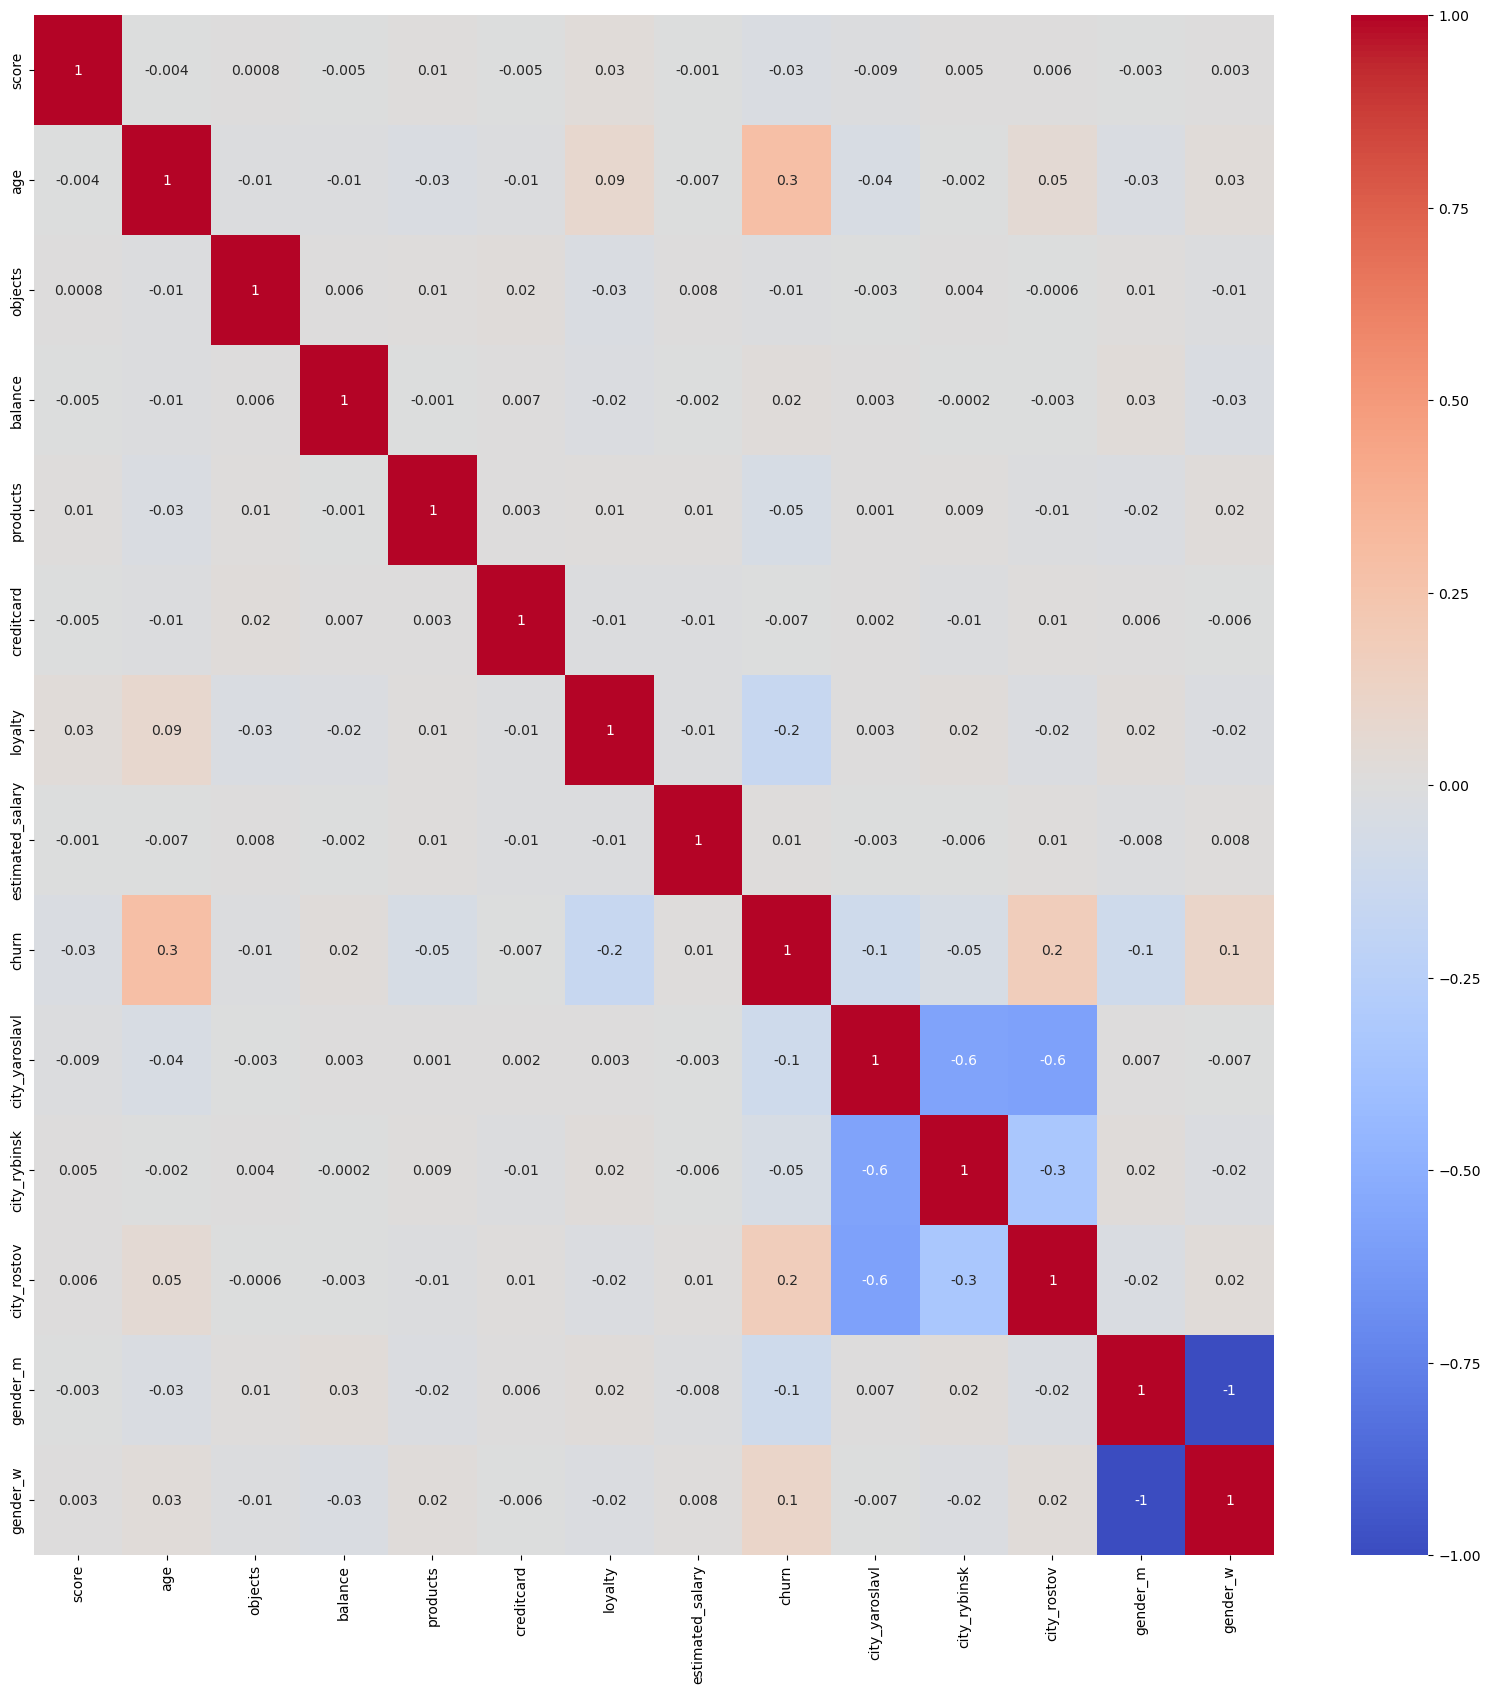

In [13]:
df_corr = data.loc[:, 'score':'gender_w'].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot = True, center = 0, fmt='.1g', cmap= 'coolwarm')
plt.show()

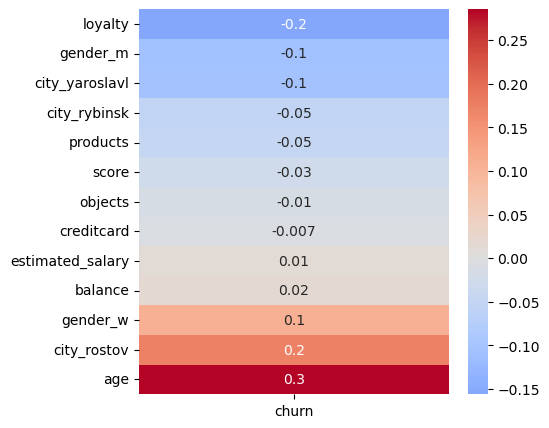

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_corr.loc[:, ['churn']].drop('churn').sort_values('churn')\
            , annot = True, center = 0, fmt='.1g', cmap= 'coolwarm')
plt.show()


Создадим портреты отточных и неотточных пользователей 
    
<a id='step2_2'></a>


In [15]:
data.groupby('churn').mean().T.round(2)

churn,0,1
userid,15733903.88,15732787.96
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,119535.86,120746.97
products,1.54,1.48
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68
city_yaroslavl,0.53,0.40



Большая разница между отточными и неотточными клиентами проявляется в следующих средних:

* Возраст(age)

* Активность(loyalty)
    
* Принадлежность клиента к городу Ростов Великий (city_rostov)
    
* Принадлежность клиента женскому полу


In [16]:
bins_age = data['age'].max() - data['age'].min()

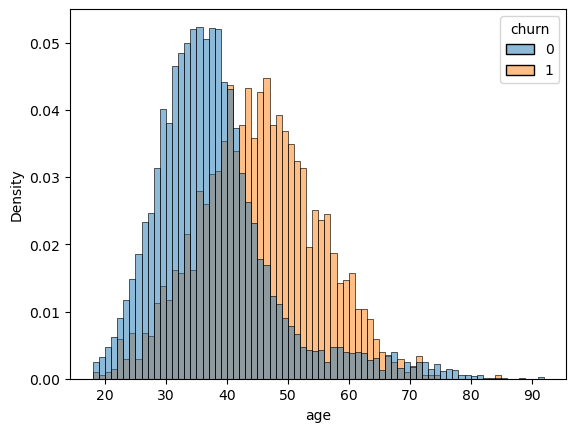

In [17]:
sns.histplot(data, x='age', hue='churn', stat='density', common_norm=False, bins=bins_age)
plt.show()

Отточные клиенты отличаются по возрасту. Это люди примерно от 40 до 65 лет - в этом возрастном промежутке преоблдают оттоки

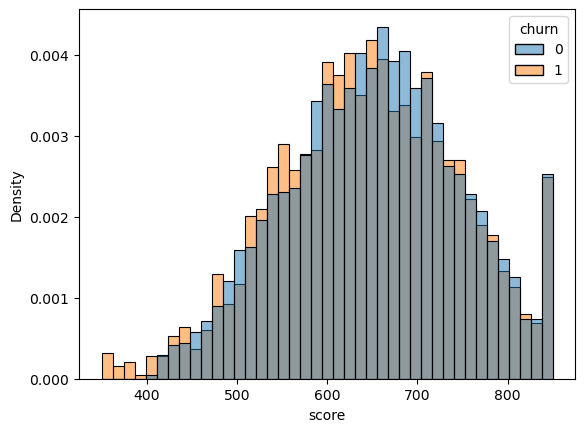

In [18]:
sns.histplot(data, x='score', hue='churn', stat='density', common_norm=False)
plt.show()

Нельзя сказать с точностью, что отточные и неотточные клиенты отличаются по очкам кредитного скоринга, но неотточные клиенты начинают преобладать над отточными чаще, начиная от 650 очков

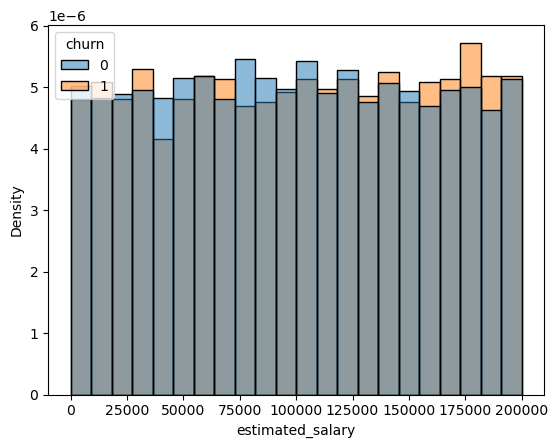

In [19]:
sns.histplot(data, x='estimated_salary', hue='churn', stat='density', common_norm=False)
plt.show()

По уровню зарплат, также нельзя дать однозначной оценки, но начиная от 150 000 рублей, доля отточных начинает преобладать над неотточными

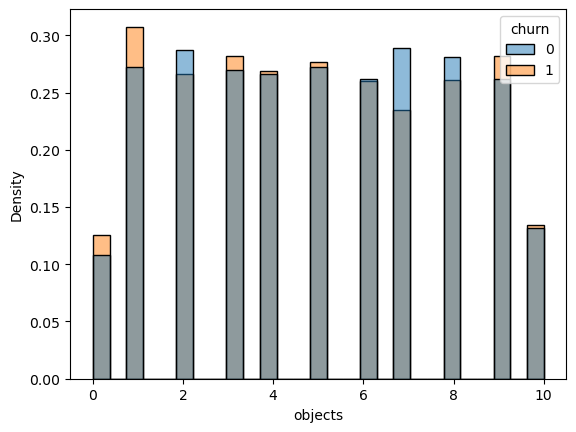

In [20]:
sns.histplot(data, x='objects', hue='churn', stat='density', common_norm=False)
plt.show()

По количеству объектов в собственности различий не выявлено

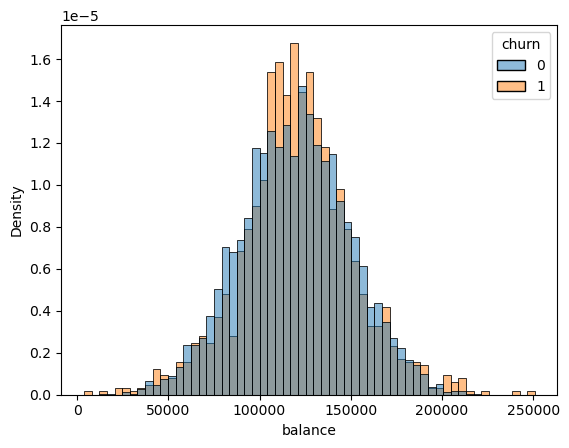

In [21]:
sns.histplot(data, x='balance', hue='churn', stat='density', common_norm=False)
plt.show()

Наблюдается высокая доля отточных клиентов, имеющих на счету 100 000 - 150 000 рублей

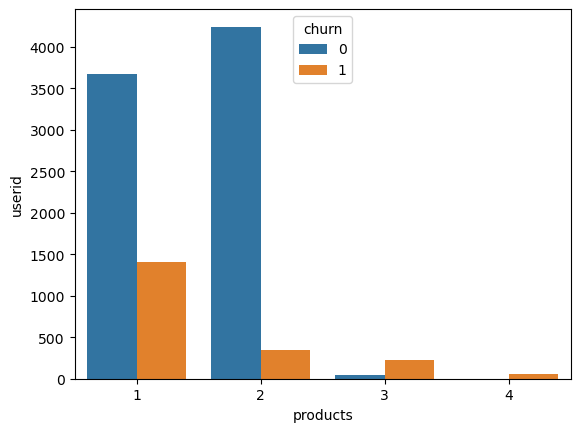

In [22]:
prod_group = data.groupby(['products', 'churn'], as_index=False).agg({'userid':'count'})
sns.barplot(x='products', y='userid', hue='churn', data=prod_group)
plt.show()

Отточный клиент имеет либо 1 продукт, либо больше 2

In [23]:
gender_count = data.groupby('gender', as_index=False).agg({'userid':'count'})

In [24]:
churn_gender = data.groupby('gender', as_index=False).agg({'churn':'sum'})
churn_gender = churn_gender.merge(gender_count, on='gender', how='left')
churn_gender['perc'] = churn_gender['churn']/churn_gender['userid']
churn_gender

,gender,churn,userid,perc
0,Ж,1139,4543,0.250715
1,М,898,5457,0.164559


Клиенты женского пола на 8,5% чаще становятся отточными мужчин

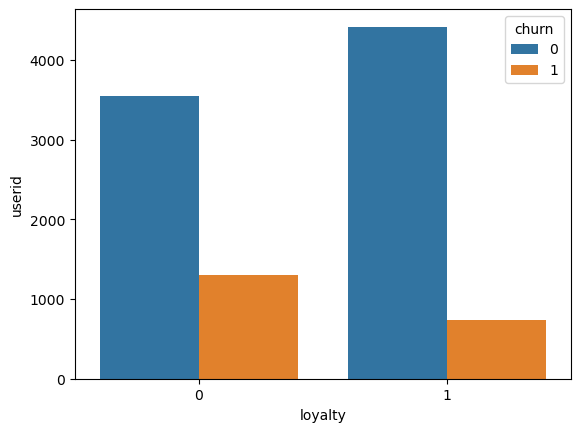

In [25]:
loy_group = data.groupby(['loyalty', 'churn'], as_index=False).agg({'userid':'count'})
sns.barplot(x='loyalty', y='userid', hue='churn', data=loy_group)
plt.show()

Отточный клиент - чаще всего неактивный

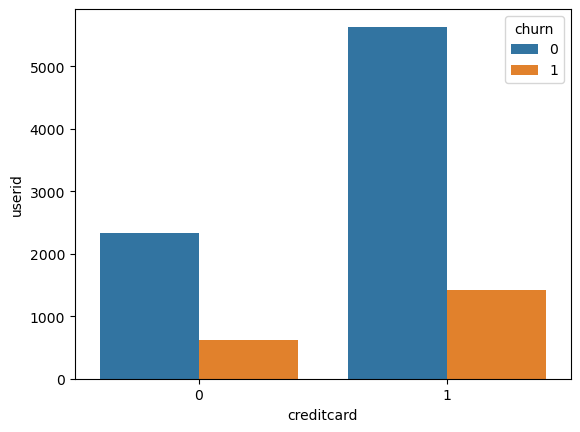

In [26]:
cred_group = data.groupby(['creditcard', 'churn'], as_index=False).agg({'userid':'count'})
sns.barplot(x='creditcard', y='userid', hue='churn', data=cred_group)
plt.show()

По наличию кредитной карты нельзя однозначно сказать, отточный клиент или нет

In [27]:
data.loc[data['city']=='Ярославль'].agg({'churn':'mean'})

churn    0.161548
dtype: float64

In [28]:
data.loc[data['city']=='Рыбинск'].agg({'churn':'mean'})

churn    0.166734
dtype: float64

In [29]:
data.loc[data['city']=='Ростов Великий'].agg({'churn':'mean'})

churn    0.324432
dtype: float64

Больше всего отточных клиентов сосредоточено в Ростове Великом


Портрет отточного клиента: женщина от 40 до 65 лет, не являющаяся активным клиентом, имеющая на балансе от 100 000 до 150 000, владеет 3/4 продуктами, имеющие меньше 650 очков, зарплата 150 000 - 200 000, 0-1 объект в собственности, из Ростова Великого, может иметь или не иметь кредитной карты.

Портрет неотточного клиента: мужчина до 40, являющийся активным клиентом, баланс либо меньше 100 000, либо больше 150 000, владеет 2 продуктами, имеющие больше 650 очков, зарплата 75 000 - 100 000, 7-8 объектов в собственности, из Ярославля, может иметь или не иметь кредитной карты.
<a id='step2_2'></a>


### Проверка гипотез ###

*Распределение нормальное, будем использовать t-критерий*

Выводы:

* Возраст клиентов с 2-умя продуктами различается от возраста клиентов с 1-им продуктом


* Возраст уходящих клиентов отличается от возраста не уходящих клиентов


<a id='step3'></a>

**Гипотеза №1**

H_0: Возраст клиентов с 2-умя продуктами = Возраст клиентов с 1-им продуктом

H_1: Возраст клиентов с 2-умя продуктами != Возраст клиентов с 1-им продуктом

alpha = 0.05


In [30]:
results = st.ttest_ind(data.loc[data['products']==2]['age'].to_list(),\
                       data.loc[data['products']==1]['age'].to_list(), equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4069637543991388e-19
Отвергаем нулевую гипотезу


**Гипотеза №2**

H_0: Возраст уходящих клиентов = Возраст не уходящих клиентов

H_1: Возраст уходящих клиентов != Возраст не уходящих клиентов

alpha = 0.05


In [31]:
results = st.ttest_ind(data.loc[data['churn']==1]['age'].to_list(),\
                       data.loc[data['churn']==0]['age'].to_list(), equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.7127272656641046e-179
Отвергаем нулевую гипотезу


### Сегментирование ###

Выделим сегменты по продуктам и выделим наиболее отточные, чтобы дать по ним реокомендации

<a id='step4'></a>

In [32]:
data.groupby('products', as_index=False).agg({'userid': 'count'})

,products,userid
0,1,5084
1,2,4590
2,3,266
3,4,60


In [33]:
data.groupby('products', as_index=False).agg({'churn': 'mean'})

,products,churn
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


In [34]:
print('Среди клиентов, имеющих 1 продукт из Ярославля:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['city_yaroslavl'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта из Ярославля:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['city_yaroslavl'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта из Ярославля:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['city_yaroslavl'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт из Рыбинска:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['city_rybinsk'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта из Рыбинска:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['city_rybinsk'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта из Рыбинска:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['city_rybinsk'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт из Ростова Великого:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['city_rostov'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта из Ростова Великого:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['city_rostov'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта из Ростова Великого:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['city_rostov'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт уходящих:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['churn'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта уходящих:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['churn'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта уходящих:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['churn'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт мужчин:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['gender_m'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта мужчин:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['gender_m'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта мужчин:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['gender_m'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт активных:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['loyalty'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта активных:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['loyalty'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта активных:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['loyalty'].mean(), 2)), 'пользователей')
print('   ')
print('Среди клиентов, имеющих 1 продукт с кредитными картами:',\
      "{:.0%}".format(round(data.loc[data['products'] == 1]['creditcard'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 продукта с кредитными картами:',\
      "{:.0%}".format(round(data.loc[data['products'] == 2]['creditcard'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 3 и более продукта с кредитными картами:',\
      "{:.0%}".format(round(data.loc[data['products'] > 2]['creditcard'].mean(), 2)), 'пользователей')

Среди клиентов, имеющих 1 продукт из Ярославля: 49% пользователей
Среди клиентов, имеющих 2 продукта из Ярославля: 52% пользователей
Среди клиентов, имеющих 3 и более продукта из Ярославля: 41% пользователей
   
Среди клиентов, имеющих 1 продукт из Рыбинска: 24% пользователей
Среди клиентов, имеющих 2 продукта из Рыбинска: 26% пользователей
Среди клиентов, имеющих 3 и более продукта из Рыбинска: 22% пользователей
   
Среди клиентов, имеющих 1 продукт из Ростова Великого: 27% пользователей
Среди клиентов, имеющих 2 продукта из Ростова Великого: 23% пользователей
Среди клиентов, имеющих 3 и более продукта из Ростова Великого: 37% пользователей
   
Среди клиентов, имеющих 1 продукт уходящих: 28% пользователей
Среди клиентов, имеющих 2 продукта уходящих: 8% пользователей
Среди клиентов, имеющих 3 и более продукта уходящих: 86% пользователей
   
Среди клиентов, имеющих 1 продукт мужчин: 55% пользователей
Среди клиентов, имеющих 2 продукта мужчин: 55% пользователей
Среди клиентов, имеющих 3 

Как мы выделили ранее, большое количество отточных клиентов, имеющих либо 1 продукт, либо больше 2

Связи оттока таких клиентов и наличии у них кредитной карты не обнаружено


In [35]:
print('Среди клиентов, не имеющих продуктов кроме кредитной карты уходящих:',\
      "{:.0%}".format(round(data.loc[data['products_no_credit'] == 0]['churn'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 1 продукт кроме кредитной карты уходящих:',\
      "{:.0%}".format(round(data.loc[data['products_no_credit'] == 1]['churn'].mean(), 2)), 'пользователей')
print('Среди клиентов, имеющих 2 и более продукта кроме кредитной карты уходящих:',\
      "{:.0%}".format(round(data.loc[data['products_no_credit'] > 1]['churn'].mean(), 2)), 'пользователей')

Среди клиентов, не имеющих продуктов кроме кредитной карты уходящих: 28% пользователей
Среди клиентов, имеющих 1 продукт кроме кредитной карты уходящих: 14% пользователей
Среди клиентов, имеющих 2 и более продукта кроме кредитной карты уходящих: 23% пользователей


In [36]:
print('Среди клиентов с кредитной картой уходящих:',\
      "{:.0%}".format(round(data.loc[data['creditcard'] == 1]['churn'].mean(), 2)), 'пользователей')


Среди клиентов с кредитной картой уходящих: 20% пользователей


**Рассмотрим отток клиентов по городам**

Больше всего уходящих клиентов с 3-мя и более продуктами из Ростова Великого - 91%

В независимости от колиства продуктов в Ростове выше отток клиентов, рассмотрим его подробней

In [37]:
data.loc[(data['products']>2) & (data['city']=='Ярославль')].agg({'churn':'mean'})

churn    0.834586
dtype: float64

In [38]:
data.loc[(data['products']>2) & (data['city']=='Рыбинск')].agg({'churn':'mean'})

churn    0.808219
dtype: float64

In [39]:
data.loc[(data['products']>2) & (data['city']=='Ростов Великий')].agg({'churn':'mean'})

churn    0.916667
dtype: float64

In [40]:
data.loc[data['city']=='Ярославль'].agg({'churn':'mean'})

churn    0.161548
dtype: float64

In [41]:
data.loc[data['city']=='Рыбинск'].agg({'churn':'mean'})

churn    0.166734
dtype: float64

In [42]:
data.loc[data['city']=='Ростов Великий'].agg({'churn':'mean'})

churn    0.324432
dtype: float64

**Отдельно рассмотрим отток клиентов Ростова по продуктам**

Отдельно, в качестве сегмента, выделим клиентов Ростова с одним продуктом

In [43]:
data.loc[(data['products']==1) & (data['city']=='Ростов Великий')].agg({'churn':'mean'})

churn    0.428466
dtype: float64

In [44]:
data.loc[(data['products']==2) & (data['city']=='Ростов Великий')].agg({'churn':'mean'})

churn    0.121154
dtype: float64

**Выделим отточные сегменты и дадим по ним рекомендации**

In [45]:
data.loc[data['products']>2].agg({'userid':'count', 'churn':'mean'})

userid    326.000000
churn       0.858896
dtype: float64

In [46]:
data.loc[(data['products']==1)& (data['city']=='Ростов Великий')].agg({'userid':'count', 'churn':'mean'})

userid    1349.000000
churn        0.428466
dtype: float64

In [47]:
data.loc[(data['gender']=='Ж') & (data['loyalty']==0) & (data['products']==1)].agg({'userid':'count', 'churn':'mean'})

userid    1161.000000
churn        0.429802
dtype: float64


Сегмент пользователей 3х и более продуктов, размер 326, уровень оттока 85,8%, рекомендации:
    
1. Предложить льготные условия ставок по вкладу и кредитов для клиентов, имеющих 3 и более продуктов
2. Сделать понятный интерфейс для приложений, возможно более взрослым клиентам в нем сложно разобраться, тем более, когда несколько продуктов
3. Провести тренинги для сотрудников Метанпром, как работать с клиентами 40+
    
Сегмент пользователей из Ростова Великого с одним продуктом, размер 1349, уровень оттока 42,8%, рекомендации:

1. Предложить клиентам льготные условия при переводе зарплаты или пенсии в Метанпром
2. Сделать возможным оплату ЖКХ через Метанпром без комиссии, провести на этой новости рекламную акцию
3. Провести тренинги для сотрудников Метанпром, как работать с клиентами 40+
4. В Ростове Великом повесить рекламный банер метанпром возле почты, рынка
5. Привлечь для рекламы на ТВ актеров от 40 до 60 лет
    
Сегмент пользователей женского пола, не активных, имеющих 1 продукт, размер 1161, уровень оттока 43%, рекомендации:
    
1. Осуществить sms/email-рассылку женщинам, имеющим 1 продукт с информацией о том, что они получили предварительное одобрение на оформление кредита по выгодным условиям

<a id='step5'></a>
